Lena Siemer & Jonas Neuschäfer
# 2 SUPPORT VECTOR MACHINES
## 2.2 SUPPORT VECTOR MACHINES
### 2.2.1 Sequential minimal optimization
Task 2.1. Implement the function `OneStep` from algorithm 2.1, which takes
one iterative step of the SMO algorithm for two selected indices $i$ and $j$.

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def f(t = None, beta = None, b = None, X = None, y = None):
  return ((beta * y).T @ np.dot(X, t)) + b

def OneStep(i = None, j = None, beta = None, b = None, C = None, X = None, y = None):
  delta = y[i] * ((f(X[j], beta, b, X, y) - y[j]) - (f(X[i], beta, b, X, y) - y[i]))
  s = y[i] * y[j]
  chi = np.dot(X[i], X[i]) + np.dot(X[j], X[j]) - (2 * np.dot(X[i], X[j]))
  gamma = (s * beta[i]) + beta[j]
  if s == 1:
    L = max(0, (gamma - C))
    H = min(gamma, C)
  else:
    L = max(0, -gamma)
    H = min(C, (C - gamma))
  if chi > 0:
    beta[i] = min(max((beta[i] + (delta/chi)), L), H)
  elif delta > 0:
    beta[i] = L
  else:
    beta[i] = H
  beta[j] = gamma - (s * beta[i])
  b = b - 1/2 * (f(X[i], beta, b, X, y) - y[i] + f(X[j], beta, b, X, y) - y[j])
  return beta, b

Task 2.2. To have a small data set on which we can test our algorithm, we draw $20$ two-dimensional vectors according to an exponential distribution with $\lambda = 4$ in each of the coordinate directions, i.e. the $j$-th coordinate of the
$i$-th vector is drawn i.i.d. according to $[x_i]_j \sim \text{exp}(4)$ for all $i = 1, \dots, 20$ and $j = 1, 2$. We assign the label $-1$ to these $x_i$. Then, we draw $20$ twodimensional vectors according to $\text{exp}(0.5)$ in the same way and assign the label $1$ to them.

In [93]:
np.random.seed(1)

def create_data_points(n = None):
  h = int(n/2)
  x_1 = np.random.exponential(1/4, (h, 2))
  label_x_1 = np.full((h, 1), -1)
  x_2 = np.random.exponential(2, (h, 2))
  label_x_2 = np.full((h, 1), 1)
  X = np.concatenate((x_1, x_2))
  y = np.concatenate((label_x_1, label_x_2))
  return X, y

X, y = create_data_points(40)

Task 2.3. Implement a function `SMO` which initializes $β = 0$ and $b = 0$ and - in each iteration step - randomly picks $i, j ∈ {1, \dots, n}$ such that $i \neq j$ andcalls `OneStep` with indices $i, j$ to perform an optimization.

(a) After the last iteration step, we need to compute a final estimate for
$b$. To this end, calculate the mean me of $f(x_k) - y_k$ for all indices $k \in {1, \dots, n}$ for which $0 < \beta_k < C$. Then, set $b ← b - \text{me}$.

In [94]:
def SMO(iter = None, C = None, X = None, y = None, n=None):
  h = y.shape
  beta = np.full(h, 0)
  b = 0
  z = 0
  while z < iter:
    i = np.random.randint(0, h[0])
    j = np.random.randint(0, h[0])
    if i != j:
      beta, b = OneStep(i, j, beta, b, C, X, y)
      z = z + 1
      print(beta)

# (a) compute a final estimate for  b
  if sum((beta > 0) & (beta < C)) != 0:
    me = np.mean((np.apply_along_axis(f, axis=1, arr=X, beta=beta, b = b, X=X, y=y) - y)[(beta > 0) & (beta < C)])
    b = b - me

  return b, beta

(b) Run the SMO function with $10000$ iteration steps to compute a support vector classifier $f$ for the $n = 40$ data points from task 2.2. Compute the results for $C = 0.01, C = 1$ and $C = 100$. For each $C$, plot the scattered data and the hyperplane corresponding to $f = 0$. Compare
your results to the separating hyperplane computed by a linear least
squares algorithm.

(c) Count the number of support vectors. Mark the corresponding $x_k$ in your scattered data plot.

(d) Furthermore, also count the number of margin defining vectors, i.e. the number of indices $k \in {1, \dots, n}$ for which $C > \beta_k > 0$ and mark the corresponding $x_k$ in the scattered data plot.

In [95]:
# LLS as benchmark
def add_intercept(data = None):
  return np.concatenate((np.ones((data.shape[0], 1)), data), axis=1)
X_int = add_intercept(X)
def LLS(data = None, values = None):
  return np.linalg.solve((data.T @ data), (data.T @ values))
alpha_LLS = LLS(X_int, y)

# accuracy
def confusion(points = None, coeff_est = None, y = None):
  y_hat = points @ coeff_est > 0 # points classified as 1?
  real = y > 0
  C = np.zeros((2, 2))
  for i in range(2):
    for j in range(2):
      C[i, j] = sum((y_hat == i) & (real == j))
  print('Confusion Matrix:')
  print(C)
  print(f'Accuracy: {np.trace(C)/len(real)*100}%')

C = 1:


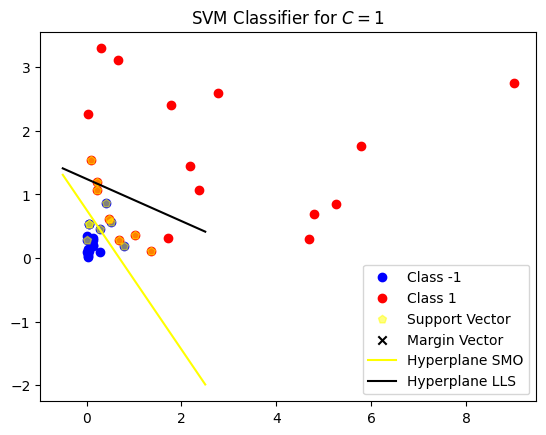

Number of Support vectors:
14
Number of Margin vectors:
0
LLS:
Confusion Matrix:
[[20.  6.]
 [ 0. 14.]]
Accuracy: 85.0%
SVM:
Confusion Matrix:
[[16.  0.]
 [ 4. 20.]]
Accuracy: 90.0%
C = 100:


<ipython-input-95-f43a64db2261>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C[i, j] = sum((y_hat == i) & (real == j))


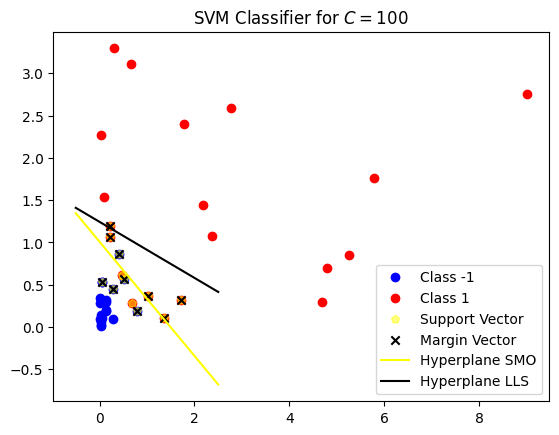

Number of Support vectors:
12
Number of Margin vectors:
10
LLS:
Confusion Matrix:
[[20.  6.]
 [ 0. 14.]]
Accuracy: 85.0%
SVM:
Confusion Matrix:
[[19.  2.]
 [ 1. 18.]]
Accuracy: 92.5%
C = 0.01:


<ipython-input-96-440ee8ed06c0>:22: RuntimeWarning: divide by zero encountered in divide
  y_values_S = (-alpha_S[0] - alpha_S[1]*x_values)/alpha_S[2]
<ipython-input-96-440ee8ed06c0>:22: RuntimeWarning: invalid value encountered in divide
  y_values_S = (-alpha_S[0] - alpha_S[1]*x_values)/alpha_S[2]


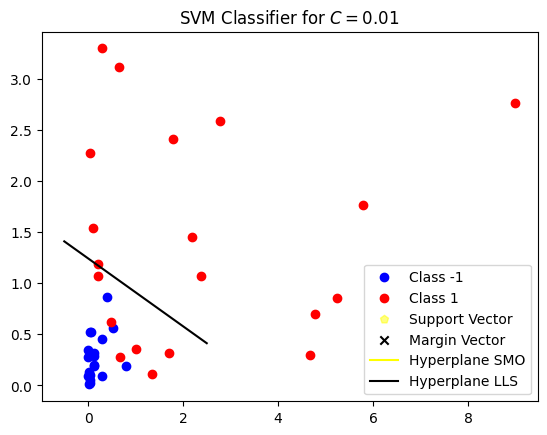

Number of Support vectors:
0
Number of Margin vectors:
0
LLS:
Confusion Matrix:
[[20.  6.]
 [ 0. 14.]]
Accuracy: 85.0%
SVM:
Confusion Matrix:
[[20. 20.]
 [ 0.  0.]]
Accuracy: 50.0%


In [96]:
# Attention!!!: We encounter an error.

np.random.seed(1)
iter = 1000
for C in (1, 100, 0.01):
  print(f'C = {C}:')
  b, beta = SMO(iter, C, X, y)
  alpha_S = np.concatenate((np.array([b]), (beta * y).T @ X), axis = 1).reshape(alpha_LLS.shape)

  # Support vectors
  h1 = (beta > 0).reshape(X[:,0].shape)
  x_supp = X[:,0][h1]
  y_supp = X[:,1][h1]

  # Margin vector
  h2 = ((beta > 0) & (beta < C)).reshape(X[:,0].shape)
  x_margin = X[:,0][h2]
  y_margin = X[:,1][h2]

  #plt
  x_values = np.linspace(-0.5, 2.5)
  y_values_S = (-alpha_S[0] - alpha_S[1]*x_values)/alpha_S[2]
  y_values_LLS = (-alpha_LLS[0] - alpha_LLS[1]*x_values)/alpha_LLS[2]
  plt.scatter(X[:20, 0], X[:20, 1], color = 'b', label = 'Class -1')
  plt.scatter(X[20:, 0], X[20:, 1], color = 'r', label = 'Class 1')
  plt.scatter(x_supp, y_supp, color = 'yellow', label = 'Support Vector', alpha = 0.5, marker = "p")
  plt.scatter(x_margin, y_margin, color = 'black', label = 'Margin Vector', marker = "x")
  plt.plot(x_values, y_values_S, 'yellow', label = 'Hyperplane SMO')
  plt.plot(x_values, y_values_LLS, 'black', label = 'Hyperplane LLS')
  plt.title(f'SVM Classifier for $C = {C}$')
  plt.legend()
  plt.show()

  print("Number of Support vectors:")
  print(sum(h1))
  print("Number of Margin vectors:")
  print(sum(h2))

  # accuracy
  print('LLS:')
  confusion(X_int, alpha_LLS, y)
  print('SVM:')
  confusion(X_int, alpha_S, y)

What influence does the parameter $C$ have on the number of the support vectors and on the position of the separating hyperplane?

Maximization of the minimum distance

Task 2.4. Draw $2000$ test data points according to the distributions from
task 2.2 ($1000$ points for class $-1$ and $1000$ points for class $1$). Evaluate the accuracy (percentage of correctly classified data points) for the LLS and SVM models calculated in task task 2.3.

In [97]:
# create data points
n = 2000
X, y = create_data_points(n)

# accuracy of for LLS
print('LLS:')
X_int = add_intercept(X)
alpha_LLS = LLS(X_int, y)
confusion(X_int, alpha_LLS, y)

# accuracy of for SVM
print('SVM:')
for C in (1, 100, 0.01):
  print(f'C = {C}:')
  b, beta = SMO(iter, C, X, y)
  alpha_S = np.concatenate((np.array([b]), (beta * y).T @ X), axis = 1).reshape(alpha_LLS.shape)
  confusion(X_int, alpha_S, y)

LLS:
Confusion Matrix:
[[999. 299.]
 [  1. 701.]]
Accuracy: 85.0%
SVM:
C = 1:
Confusion Matrix:
[[1000.  762.]
 [   0.  238.]]
Accuracy: 61.9%
C = 100:


<ipython-input-95-f43a64db2261>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C[i, j] = sum((y_hat == i) & (real == j))


Confusion Matrix:
[[843. 263.]
 [157. 737.]]
Accuracy: 79.0%
C = 0.01:
Confusion Matrix:
[[1000. 1000.]
 [   0.    0.]]
Accuracy: 50.0%


Task 2.6. Generate 50 uniformly distributed i.i.d. points which lie in {t ∈R2 | ∥t∥2 < 1} (e.g. by drawing uniformly distributed points in (−1, 1)*2
until 50 of them are within the unit sphere) and label them by −1. Now generate
50 data points, which are uniformly distributed in {t ∈ R2 | 1 < ∥t∥2 < 2}
and label them by 1.

In [98]:
n = 50
data1 = []
while len(data1) < n:
  datapoint = np.random.uniform(-1, 1, 2)
  if np.linalg.norm(datapoint) < 1:
    data1.append(datapoint)
label1 = np.full((n, 1), -1)
data1 = np.array(data1)

data2=[]
while len(data2)<n:
  datapoint=np.random.uniform(-2,2,2)
  if np.linalg.norm(datapoint)>1 and np.linalg.norm(datapoint) < 2:
    data2.append(datapoint)
label2 = np.full((n, 1), 1)
data2=np.array(data2)

data= np.concatenate((data1,data2))
label = np.concatenate((label1,label2))
#print(data)

(a) Fit a linear SVM for C = 10 to the data and plot the scattered data as
well as the separating hyperplane.

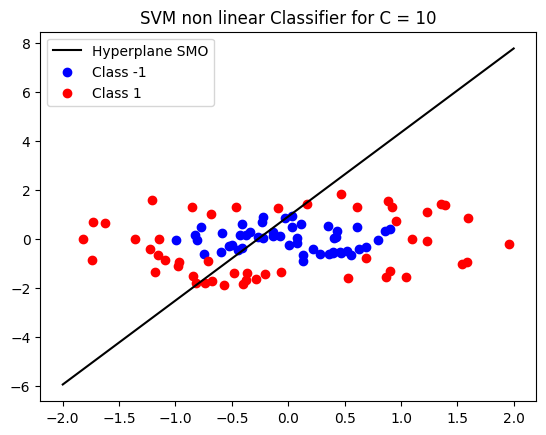

In [99]:
C = 10
b, beta = SMO(1000, C, data, label)
#print(beta)
alpha_S = np.concatenate((np.array([b]), (beta * label).T @ data), axis = 1).reshape(alpha_LLS.shape)

x_values = np.linspace(-2, 2)
y_values_S = (-alpha_S[0] - alpha_S[1]*x_values)/alpha_S[2]
plt.plot(x_values, y_values_S, 'k', label = 'Hyperplane SMO')
plt.scatter(data[:50, 0], data[:50, 1], color = 'b', label = 'Class -1')
plt.scatter(data[50:, 0], data[50:, 1], color = 'r', label = 'Class 1')
plt.title('SVM non linear Classifier for C = 10')
plt.legend()
plt.show()

b) Transform the data by the feature map ϕ : R2 → R3 defined by
ϕ(t) := (t1, t2, t1^2 + t2^2) .
Fit an SVM for C = 10 to the transformed data. Plot the scattered data
and the nonlinear separation curve in a 2d plot (i.e. in the same way as
in (a)). What does the feature map do and why does it work so well?

The feature map, doesn't change the x and y variables but it adds a thid dimension. If we only look at that dimension, we can clearly see a difference between the data with lable 1 and the data with label -1. The data with lable -1 will be in z \in (0,1) while the data with label 1 will be in z \in (1,2). So we can draw a seperation plane at z=1

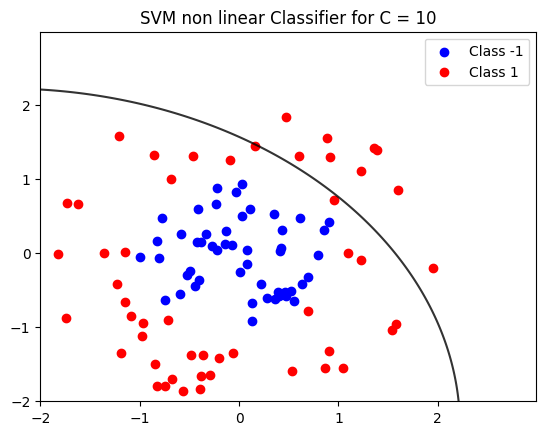

In [100]:
#transform the data
def transform(X):
  phi=[]
  for i in range(len(X)):
    phi.append([X[i][0],X[i][1],X[i][0]**2+X[i][1]**2])
  return phi

phi = transform(data)
b, beta = SMO(1000, C, phi, label)
alpha = np.concatenate((np.array([b]), (beta * label).T @ phi), axis = 1).reshape((4,1))

#create the seperation line by creating a meshgrid and the predictions
x_min, x_max = -2, 3
y_min, y_max = -2, 3
h = 0.01  # step size in the mesh
#create points, on which we apply f
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
# Predict labels for mesh points

Z = np.array([alpha[0]+ alpha[1]*mesh_point[0]+alpha[1] * mesh_point[1]+ alpha[2]*(mesh_point[0]**2+mesh_point[1]**2) for mesh_point in mesh_points])
Z = Z.reshape(xx.shape)

# Plot scattered data points and decision boundary
#levels=[0 gibt uns nur die trennungslinie
plt.contour(xx, yy, Z, colors='k',levels=[0], alpha=0.8)
plt.scatter(data[:50, 0], data[:50, 1], color = 'b', label = 'Class -1')
plt.scatter(data[50:, 0], data[50:, 1], color = 'r', label = 'Class 1')
plt.title('SVM non linear Classifier for C = 10')
plt.legend()
plt.show()

In [68]:
Z.shape

(500, 500)

Task 2.7. Change your SMO code and your function evaluation of f from
(2.2) such that it allows to use a kernel function instead of the scalar product
of the input data, i.e. substitute all scalar products by the evaluation of the
kernel function. Perform a SVM classification (C = 10) with Gaussian kernel
(σ = 1) for the data from task 2.6. Plot the scattered data and the nonlinear
separation curve in a 2d plot. The result should look similar to fig. 2.3.

In [69]:
def f_nonlinear(t = None, beta = None, b = None, X = None, y = None, sig=None):
  #print(len(np.exp(-np.linalg.norm((t - X), axis=1) ** 2 / (2 * sig ** 2))))
  #print(beta.T*y)
  return ((beta * y).T @ np.exp(-np.linalg.norm((t - X), axis=1) ** 2 / (2 * sig ** 2))) + b

def OneStep_nonlinear(i = None, j = None, beta = None, b = None, C = None, X = None, y = None, sig=1):
  delta = y[i] * ((f_nonlinear(X[j], beta, b, X, y,sig) - y[j]) - (f_nonlinear(X[i], beta, b, X, y,sig) - y[i]))
  s = y[i] * y[j]
  chi = np.dot(X[i], X[i]) + np.dot(X[j], X[j]) - (2 * np.dot(X[i], X[j]))
  gamma = (s * beta[i]) + beta[j]
  if s == 1:
    L = max(0, (gamma - C))
    H = min(gamma, C)
  else:
    L = max(0, -gamma)
    H = min(C, (C - gamma))
  if chi > 0:
    #print('chi',chi)
    beta[i] = min(max((beta[i] + (delta/chi)), L), H)
  elif delta >= 0:
    #print('delta',delta)
    beta[i] = L
  else:
    #print('else')
    beta[i] = H
  beta[j] = gamma - (s * beta[i])
  b = b - 1/2 * (f_nonlinear(X[i], beta, b, X, y,sig) - y[i] + f_nonlinear(X[j], beta, b, X, y,sig) - y[j])
  return beta, b

def SMO_nonlinear(iter = None, C = None, X = None, y = None,sig=1):
  beta = np.full(y.shape, 0)
  b = 0
  z = 0
  while z < iter:
    i = np.random.randint(0, 100)
    j = np.random.randint(0, 100)
    if i != j:
      beta, b = OneStep_nonlinear(i, j, beta, b, C, X, y,sig)
      z = z + 1

# (a) compute a final estimate for  b
  if sum((beta > 0) & (beta < 1)) != 0:
    me = np.mean((np.apply_along_axis(f_nonlinear, axis=1, arr=X, beta=beta, b = b, X=X, y=y,sig=sig) - y)[(beta > 0) & (beta < C)])
    b = b - me

  return b, beta

sigma=1
C=10
b, beta = SMO_nonlinear(1000, C, data, label, sigma)

beta
#b
#alpha_N = np.concatenate((np.array([b]), (beta * y).T @ X), axis = 1)


array([[ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 3],
       [ 0],
       [ 0],
       [ 6],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 5],
       [ 0],
       [ 3],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 3],
       [ 0],
       [ 3],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 6],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [10],
       [ 2],
       [ 0],
       [ 0],

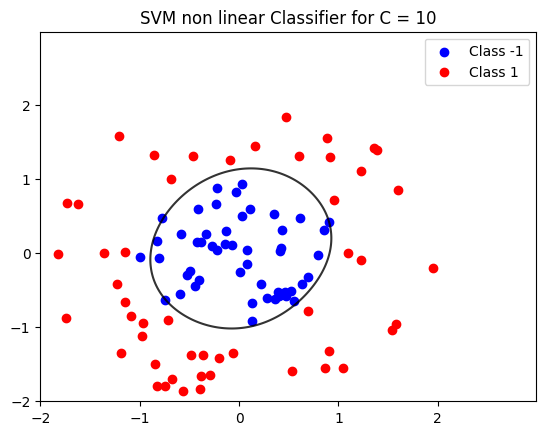

In [70]:
# plot the data and the nonlinear seperation line
#create the seperation line by creating a meshgrid and the predictions
x_min, x_max = -2, 3
y_min, y_max = -2, 3
h = 0.01  # step size in the mesh
#create points, on which we apply f
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
# Predict labels for mesh points
Z = np.array([f_nonlinear(mesh_point, beta, b, data, label, sigma) for mesh_point in mesh_points])
Z = Z.reshape(xx.shape)

# Plot scattered data points and decision boundary
#levels=[0 gibt uns nur die trennungslinie
plt.contour(xx, yy, Z, colors='k',levels=[0], alpha=0.8)
plt.scatter(data[:50, 0], data[:50, 1], color = 'b', label = 'Class -1')
plt.scatter(data[50:, 0], data[50:, 1], color = 'r', label = 'Class 1')
plt.title('SVM non linear Classifier for C = 10')
plt.legend()
plt.show()

Task 2.8.

In [1]:
import os
import gzip
import numpy as np
import tarfile

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data / np.float32(255)

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Pfade zu den extrahierten Dateien
train_images_file = os.path.join('MNIST/raw/train-images-idx3-ubyte.gz')
train_labels_file = os.path.join('MNIST/raw/train-labels-idx1-ubyte.gz')
test_images_file = os.path.join('MNIST/raw/t10k-images-idx3-ubyte.gz')
test_labels_file = os.path.join('MNIST/raw/t10k-labels-idx1-ubyte.gz')

# Laden der Daten
X_train = load_mnist_images(train_images_file)
Y_train = load_mnist_labels(train_labels_file)
X_test = load_mnist_images(test_images_file)
Y_test = load_mnist_labels(test_labels_file)

(a) Choose a random subset of size 500 from the MNIST training data and use this as your new training data set for crossvalidation. Perform a 5-fold crossvalidation SVM to determine the optimal parameters among C ∈ {1, 10, 100} and γ = 1 2σ2 ∈ {0.1, 0.01, 0.001}. (Hint: You can use the scikit-learn function GridSearchCV.)

In [3]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

#choose 500 data from the training data
#create array with random numbers
def subset_MNIST(n):
    numbers=np.random.randint(0,len(X_train),n)
    #create array with data
    im_train=X_train[numbers]
    la_train=Y_train[numbers]
    return im_train, la_train

im_train=subset_MNIST(500)[0]
la_train=subset_MNIST(500)[1]

#5-fold cross validation
parameter = {'C': [1, 10, 100], 'gamma': [1/(2*sigma**2) for sigma in [0.1, 0.01, 0.001]]}

#the input data has more dimensions than svm expects
im_train_flat = im_train.reshape(im_train.shape[0], -1)

#define classifier
svc = svm.SVC()

#GridSearch
grid=GridSearchCV(svc, parameter, cv=5)
grid.fit(im_train_flat,la_train)

#print best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1, 'gamma': 49.99999999999999}


(b) Use the determined optimal parameters to learn a support vector classifier on a random 2, 000 point subset of the MNIST training data and evaluate the confusion matrix and the accuracy on the whole MNIST test data set. (Hint: You can use the scikit-learn module metrics.)

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# create array with 2,000 trainings data
x_train=subset_MNIST(2000)[0]
y_train=subset_MNIST(2000)[1]

#support vector classifier
classifier= svm.SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'])

x_train_flat=x_train.reshape(x_train.shape[0], -1)
classifier.fit(x_train_flat, y_train)

#compute the predicted values
y_pred= classifier.predict(x_train_flat)

#confusion matrix
conf=confusion_matrix(y_train,y_pred)
print("confusion_matrix:")
print(conf)

#accuracy
print("accuacy:",accuracy_score(y_train, y_pred))

confusion_matrix:
[[224   0   0   0   0   0   0   0   0   0]
 [  0 215   0   0   0   0   0   0   0   1]
 [  1   0 162   0   0   2   0   1   2   2]
 [  1   0   0 197   0   0   0   1   0   1]
 [  1   0   0   0 188   0   0   1   0   0]
 [  1   1   0   0   0 195   0   0   0   0]
 [  0   0   0   0   0   2 176   1   2   0]
 [  1   0   0   0   0   0   0 206   1   0]
 [  0   3   0   0   0   0   0   0 210   0]
 [  0   1   0   0   0   0   0   0   0 200]]
accuacy: 0.9865


Is our approach of picking a different training set in step (b) – and learning
with the optimal parameters from (a) – valid? Are there potential pitfalls?

1. we generilise our results from a to unseen new data. Might not be accurate anymore